<H1>1. Problem Description</H1>

Dataset of Pizza Price

This dataset for beginners for practice

https://www.kaggle.com/alyeasin/predict-pizza-price

The model could be used for pizza price prediction.


In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math as mathf

%matplotlib inline

In [153]:
df = pd.read_csv('Pizza-Price.csv')
df.head()

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750


<h1>2. EDA</h1>

<b>Fields Type</b>

In [154]:
df.dtypes

Restaurant        object
Extra Cheeze      object
Extra Mushroom    object
 Size by Inch      int64
Extra Spicy       object
Price              int64
dtype: object

<b>Check nulls, duplicates and Nuniques</b>

In [155]:
df.isnull().sum()

Restaurant        0
Extra Cheeze      0
Extra Mushroom    0
 Size by Inch     0
Extra Spicy       0
Price             0
dtype: int64

In [156]:
df.duplicated().sum()

0

In [157]:
df.nunique()

Restaurant        20
Extra Cheeze       2
Extra Mushroom     2
 Size by Inch      4
Extra Spicy        2
Price             10
dtype: int64

<b>Clean columns from spaces</b>

In [158]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = ['restaurant', 'extra_cheeze', 'extra_mushroom', 'size_by_inch',
       'extra_spicy', 'price']

<b>Convert the Price target variable from Taka to Euro (1 Taka == 0.010 Euro)</b>

In [159]:
df['price'] = df['price'].astype('float32')
df['price'] = df['price'] * 0.010

df.head()

,restaurant,extra_cheeze,extra_mushroom,size_by_inch,extra_spicy,price
0,A,yes,yes,12,no,6.5
1,B,no,yes,15,yes,8.0
2,C,no,no,9,no,5.0
3,D,yes,no,12,yes,7.0
4,E,yes,no,12,yes,7.5


In [160]:
numerical = ['size_by_inch', 'price']
categorical = ['restaurant', 'extra_cheeze', 'extra_mushroom', 'extra_spicy']

<b>FEATURES CORRELATION (numerical)</b>

In [161]:
df.groupby('restaurant').price.mean()

restaurant
A     6.5
B     8.0
C     5.0
D     7.0
E     7.5
F     9.0
G     6.0
H     7.0
I     7.5
J     7.0
K     6.0
L     7.0
M     5.5
N     9.0
O     7.0
P     7.5
Q    10.0
R     6.5
S     9.5
T     7.0
Name: price, dtype: float32

In [162]:
df.groupby('extra_cheeze').price.agg(['mean','count'])

,mean,count
extra_cheeze,,
no,7.500,8
yes,7.125,12


In [163]:
df.groupby('extra_mushroom').price.agg(['mean','count'])

,mean,count
extra_mushroom,,
no,6.666667,9
yes,7.772727,11


In [164]:
df.groupby('extra_spicy').price.agg(['mean','count'])

,mean,count
extra_spicy,,
no,6.500000,11
yes,8.222222,9


In [165]:
df[numerical].corrwith(df['price'])

size_by_inch    0.681904
price           1.000000
dtype: float64

Text(0.5, 1.0, 'Variable Correlation')

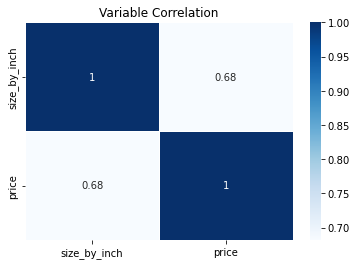

In [166]:
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

<b>Price distribution</b>

<AxesSubplot:xlabel='price', ylabel='Count'>

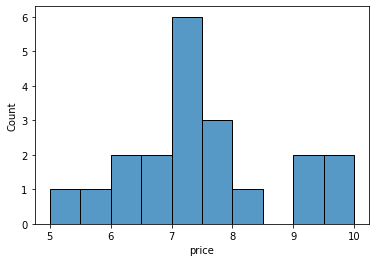

In [167]:
sns.histplot(df.price, bins=10)

<b>Mutual_info_score for categorical features</b>

<b>Make Price categorical</b>

In [168]:
pd.cut(df.price, bins=10).value_counts()

(6.5, 7.0]      6
(7.0, 7.5]      3
(4.995, 5.5]    2
(5.5, 6.0]      2
(6.0, 6.5]      2
(8.5, 9.0]      2
(7.5, 8.0]      1
(9.0, 9.5]      1
(9.5, 10.0]     1
(8.0, 8.5]      0
Name: price, dtype: int64

In [169]:
cprice = pd.cut(df.price, bins=10)

In [170]:
from sklearn.metrics import mutual_info_score

def mutual_info_price_score(series):
    return mutual_info_score(cprice, series)

mi = df[categorical].apply(mutual_info_price_score)
mi.sort_values(ascending=False)


restaurant        2.016154
extra_spicy       0.384718
extra_mushroom    0.249549
extra_cheeze      0.178636
dtype: float64

<h1>3. Model Training</h1>

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

In [172]:
numerical = ['size_by_inch']
categorical = ['restaurant', 'extra_cheeze', 'extra_mushroom', 'extra_spicy']

<b>Dataset subdivision (60-20-20)</b>

In [173]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [174]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_full_train = df_full_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_full_train['price']
del df_test['price']

In [175]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [176]:
dv.get_feature_names()

['extra_cheeze=no',
 'extra_cheeze=yes',
 'extra_mushroom=no',
 'extra_mushroom=yes',
 'extra_spicy=no',
 'extra_spicy=yes',
 'restaurant=C',
 'restaurant=D',
 'restaurant=E',
 'restaurant=G',
 'restaurant=H',
 'restaurant=J',
 'restaurant=K',
 'restaurant=L',
 'restaurant=M',
 'restaurant=N',
 'restaurant=S',
 'restaurant=T',
 'size_by_inch']

<b>Test multiple models and check RMSE best value</b>

In [177]:
model_RMSE_scores = {}

<b>LINEAR REGRESSION<b/>

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
list_RMSE = []

model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

RMSE: 0.8717005362328303


In [180]:
key = 'Linear Regression RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE='])

In [181]:
model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)

LinearRegression(normalize=True)

In [182]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [183]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 9.499999999999998)

<b>RIDGE REGRESSION with alpha tuning<b/>

In [184]:
from sklearn.linear_model import Ridge

RMSE with alpha=0.0001: 0.8714843022984912
RMSE with alpha=0.001: 0.8695614449339311
RMSE with alpha=0.01: 0.8523248063656141
RMSE with alpha=0.05: 0.8005448688991524
RMSE with alpha=0.1: 0.7593342804313911
RMSE with alpha=0.2: 0.702854428399507
RMSE with alpha=0.3: 0.6613486032353071
RMSE with alpha=0.4: 0.6280181919457227
RMSE with alpha=0.5: 0.600236553662482
RMSE with alpha=0.6: 0.576606753626137
RMSE with alpha=0.7: 0.5562576619885544
RMSE with alpha=1: 0.509682335192667
RMSE with alpha=2: 0.4400793696235886
RMSE with alpha=3: 0.42788947701054103
RMSE with alpha=5: 0.4489044549603441
RMSE with alpha=10: 0.5138463543966755


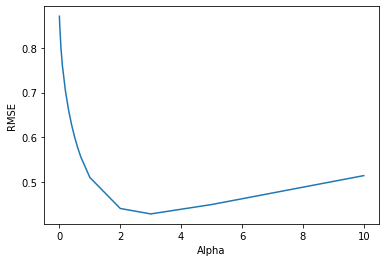

In [185]:
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3, 5, 10]
list_RMSE = []

for i in list_alpha:
    model = Ridge(alpha=i, normalize=True, random_state=42)
    model.fit(X_full_train, y_full_train)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    list_RMSE.append(RMSE)
    print(f'RMSE with alpha={i}: {RMSE}')
    
plt.plot(list_alpha,list_RMSE)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()


In [186]:
key = 'Ridge Regression (alpha 3) RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE='])

In [187]:
model = Ridge(alpha=3, normalize=True, random_state=42)
model.fit(X_full_train, y_full_train)

Ridge(alpha=3, normalize=True, random_state=42)

In [188]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [189]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 8.16432471887485)

<b>SGD REGRESSION<b/>

In [190]:
from sklearn.linear_model import SGDRegressor

In [191]:
model = SGDRegressor(random_state=42)

model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 1.1782828316062282


In [192]:
key = 'SGDRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE='])

In [193]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [194]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 9.793121806374959)

<b>SVR REGRESSION<b/>

In [195]:
from sklearn.svm import SVR

In [196]:
clf_svr = SVR()
clf_svr.fit(X_full_train, y_full_train)
y_pred = clf_svr.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')



RMSE: 0.4238536795607311


In [197]:
key = 'SVR RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE='])

In [198]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [199]:
y_pred = clf_svr.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 7.56547247224912)

<b>RANDOM FOREST REGRESSION<b/>

In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 0.769604971722506


In [202]:
key = 'RandomForestRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE='])

In [203]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [204]:
y_pred = rf.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 9.218499999999999)

<b>DECISION TREE REGRESSION<b/>

In [205]:
from sklearn.tree import DecisionTreeRegressor

In [206]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

RMSE: 0.769604971722506


In [207]:
key = 'DecisionTreeRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE='])

In [208]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [209]:
y_pred = dt.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(8.0, 9.5)

<b>XgBOOST REGRESSION with eta, max_depth, max_child_weight TUNING<b/>

In [210]:
import xgboost as xgb

In [211]:
features = dv.get_feature_names()
features

['extra_cheeze=no',
 'extra_cheeze=yes',
 'extra_mushroom=no',
 'extra_mushroom=yes',
 'extra_spicy=no',
 'extra_spicy=yes',
 'restaurant=C',
 'restaurant=D',
 'restaurant=E',
 'restaurant=G',
 'restaurant=H',
 'restaurant=J',
 'restaurant=K',
 'restaurant=L',
 'restaurant=M',
 'restaurant=N',
 'restaurant=S',
 'restaurant=T',
 'size_by_inch']

In [212]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [213]:
watchlist = [(dfulltrain, 'train'), (dtest, 'test')]

In [39]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

[0]	train-rmse:5.07980	test-rmse:4.74612
[5]	train-rmse:1.26426	test-rmse:0.76304
[10]	train-rmse:0.40296	test-rmse:0.57626
[15]	train-rmse:0.21119	test-rmse:0.79859
[20]	train-rmse:0.18138	test-rmse:0.86678
[25]	train-rmse:0.17746	test-rmse:0.88295
[30]	train-rmse:0.17689	test-rmse:0.88860
[35]	train-rmse:0.17680	test-rmse:0.89052
[40]	train-rmse:0.17678	test-rmse:0.89080
[45]	train-rmse:0.17678	test-rmse:0.89092
[50]	train-rmse:0.17678	test-rmse:0.89097
[55]	train-rmse:0.17678	test-rmse:0.89098
[60]	train-rmse:0.17678	test-rmse:0.89098
[65]	train-rmse:0.17678	test-rmse:0.89098
[70]	train-rmse:0.17678	test-rmse:0.89098
[75]	train-rmse:0.17678	test-rmse:0.89098
[80]	train-rmse:0.17678	test-rmse:0.89098
[85]	train-rmse:0.17678	test-rmse:0.89098
[90]	train-rmse:0.17678	test-rmse:0.89098
[95]	train-rmse:0.17678	test-rmse:0.89098
[100]	train-rmse:0.17678	test-rmse:0.89098
[105]	train-rmse:0.17678	test-rmse:0.89098
[110]	train-rmse:0.17678	test-rmse:0.89098
[115]	train-rmse:0.17678	test-rms

<b>10 Rounds has the best RMSE to start with</b>

In [52]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.9555293

In [53]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)
record

{'restaurant': 'B',
 'extra_cheeze': 'no',
 'extra_mushroom': 'yes',
 'size_by_inch': 15,
 'extra_spicy': 'yes'}

In [54]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(8.0, 9.508984)

<b>PARAMETERS TUNING</b>

In [55]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

<b>ETA TUNING with 10 Rounds<b/>

In [56]:
scores = {}

In [65]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [66]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.05', 'eta=1.0'])

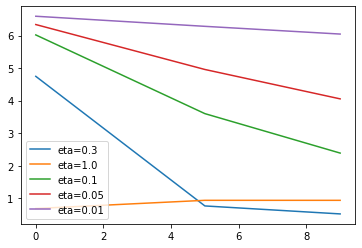

In [67]:
etas = ['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()

<b>eta=0.3 in 10 Rounds has the best RMSE<b/>

<b>max_weight TUNING<b/>

In [101]:
scores = {}

In [121]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 90,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [122]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10', 'max_depth=15', 'max_depth=30', 'max_depth=60', 'max_depth=90'])

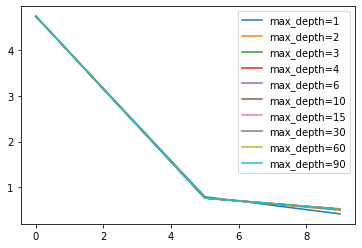

In [123]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

    
plt.legend()

<b>max_weight=1 in 10 Rounds has the best RMSE<b/>

<b>min_child_weight TUNING<b/>

In [124]:
scores = {}

In [139]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 90,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [140]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=30', 'min_child_weight=60', 'min_child_weight=90'])

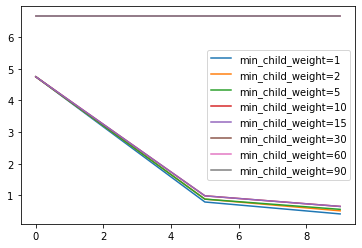

In [141]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.legend()

<b>min_child_weight=1 in 10 Rounds has the best RMSE<b/>

<b>Train the model with the best parameters</b>

In [215]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

In [216]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.41614005

In [217]:
key = 'xgboostRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE=', 'xgboostRegressor RMSE='])

In [226]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)

In [227]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(8.0, 8.048736)

In [219]:
model_RMSE_scores

{'Linear Regression RMSE=': 0.8717005362328303,
 'Ridge Regression (alpha 3) RMSE=': 0.5138463543966755,
 'SGDRegressor RMSE=': 1.1782828316062282,
 'SVR RMSE=': 0.4238536795607311,
 'RandomForestRegressor RMSE=': 0.769604971722506,
 'DecisionTreeRegressor RMSE=': 0.769604971722506,
 'xgboostRegressor RMSE=': 0.41614005}

<h1>4. Exporting notebook to script</h1>

<b>model.bin export data</b>

In [220]:
import pickle

In [221]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

In [222]:
output_file = f'model.bin'

In [223]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,model), f_out)

print(f'The Model is saved to {output_file}')

The Model is saved to model.bin
